## Verilerimizi inceleyelim

In [143]:
#Nurunnisa Kaplan_200205073
import deap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time

# Veri dosyasını yükleyip inceleyelim
file_path = r'./data_file_v2.csv'
data = pd.read_csv(file_path)

# Veri setinin ilk birkaç satırını görüntüleyelim
data.head()

,x,y
0,-5.0,-298.108727
1,-4.9,-255.602630
2,-4.8,-175.073026
3,-4.7,-230.140740
4,-4.6,-166.632522


## Veriyi görselleştirdik

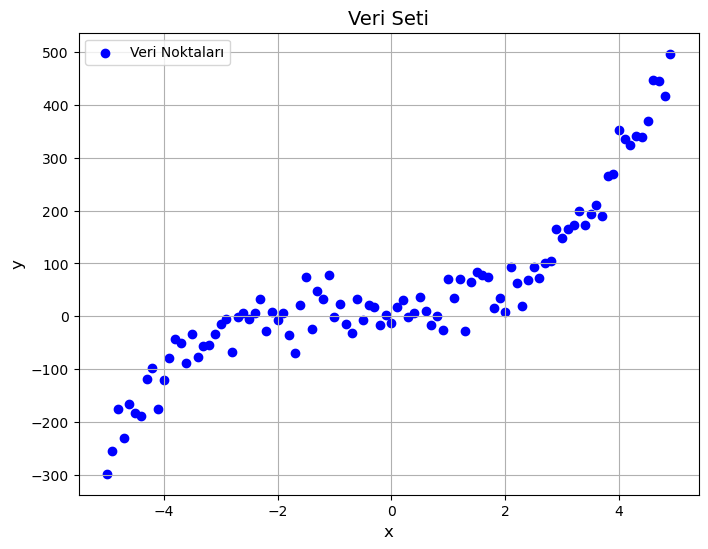

In [144]:
import matplotlib.pyplot as plt

# x ve y değişkenleri arasındaki ilişkiyi görselleştirmek amacıyla bir grafik (plot) oluşturdum.
plt.figure(figsize=(8, 6))
plt.scatter(data['x'], data['y'], color='blue', label='Veri Noktaları')
plt.title('Veri Seti', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

## Genetik Algoritma

In [145]:
population_size = 100
generation_count = 500
best_individual_count = 5
mutation_probability = 0.1
tournament_size = 3  # Turnuva boyutu

In [146]:
# dataseti yükle
x_values = data['x'].values
y_values = data['y'].values

In [147]:
# Amaç Fonksiyonu (hata hesaplama): y = a * x^3 + b * x^2 + c * x + d
def calculate_error(a, b, c, d, x, y):
    prediction = a * x**3 + b * x**2 + c * x + d
    error = np.mean((y - prediction) ** 2)
    return error

In [148]:
# Rastgele bireyler oluşturma
def random_individual():
    return [random.uniform(-10, 10) for _ in range(4)]

In [149]:
# Popülasyonu başlatma
population = [random_individual() for _ in range(population_size)]

En iyi katsayılar: a = 3.1237330478185426, b = 4.788123369361244, c = -0.31296683117072477, d = 11.343468673227514
En iyi fitness değeri: 896.2222979997724
GA çalışma süresi: 9.6195 saniye


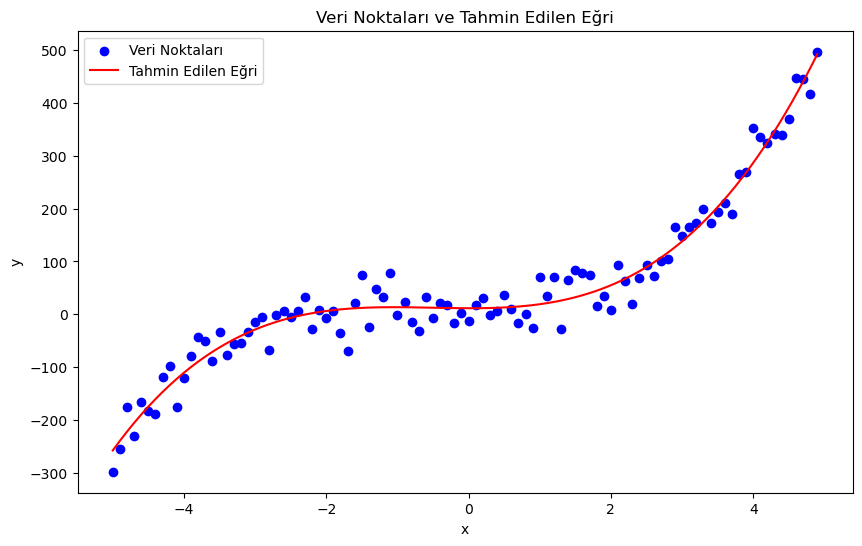

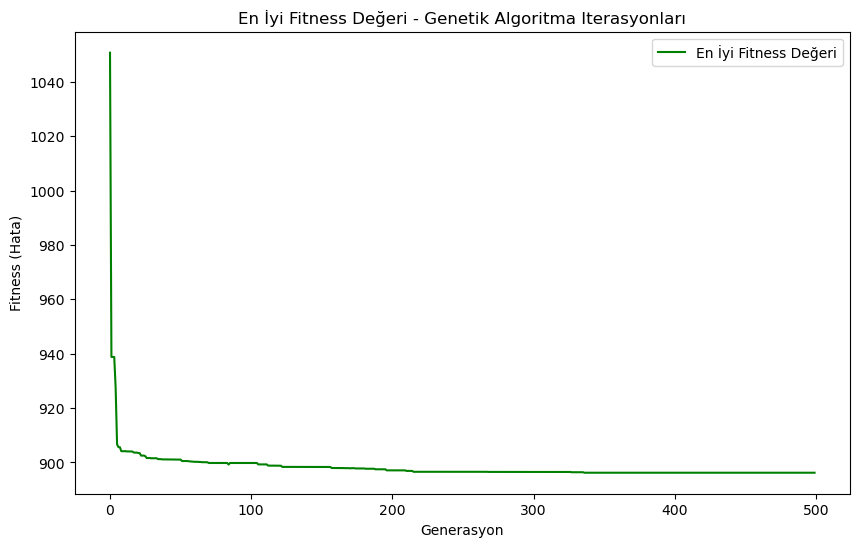

In [150]:
# Turnuva seçimi yöntemi
def tournament_selection(population, tournament_size):
    tournament = random.sample(population, tournament_size)
    tournament_errors = [(individual, calculate_error(individual[0], individual[1], individual[2], individual[3], x_values, y_values)) for individual in tournament]
    tournament_errors.sort(key=lambda x: x[1])  # Hata değerine göre sıralama (azalan)
    return tournament_errors[0][0]  # En iyi bireyi döndür

# Iterasyonları ve en iyi fitness değerini kaydedelim
best_params_per_iteration = []
best_fitness_per_iteration = []

# Genetik algoritma döngüsü
ga_start_time = time.time()
for generation in range(generation_count):
    # Popülasyonu değerlendir
    individual_errors = [(individual, calculate_error(individual[0], individual[1], individual[2], individual[3], x_values, y_values)) for individual in population]
    individual_errors.sort(key=lambda x: x[1])
    
    # En iyi çözüm ve fitness değerini kaydedelim
    best_individual = individual_errors[0][0]
    best_fitness = individual_errors[0][1]
    best_params_per_iteration.append(best_individual)
    best_fitness_per_iteration.append(best_fitness)
    
    # Turnuva seçimi ile en iyi bireyleri seç
    best_individuals = [tournament_selection(population, tournament_size) for _ in range(best_individual_count)]

    # Yeni popülasyonu oluştur (en iyi bireyleri koru)
    new_population = best_individuals.copy()
    while len(new_population) < population_size:
        # Turnuva seçimi kullanarak iki rastgele ebeveyn seç
        parent1 = tournament_selection(population, tournament_size)
        parent2 = tournament_selection(population, tournament_size)
        
        # Çaprazlama (çocuk oluştur)
        crossover_point = random.randint(0, 3)
        child = parent1[:crossover_point] + parent2[crossover_point:]
        
        # Mutasyon
        if random.random() < mutation_probability:
            index = random.randint(0, 3)
            child[index] += random.uniform(-1, 1)
        
        new_population.append(child)

    # Popülasyonu güncelle
    population = new_population
ga_end_time = time.time()
# En iyi çözümü bul ve görselleştir
best_solution = min(population, key=lambda individual: calculate_error(individual[0], individual[1], individual[2], individual[3], x_values, y_values))
a, b, c, d = best_solution

# En iyi çözümü görselleştir
x_pred = np.linspace(min(x_values), max(x_values), 500)
y_pred = a * x_pred**3 + b * x_pred**2 + c * x_pred + d

# En iyi parametreleri ve fitness değerini yazdır
print(f"En iyi katsayılar: a = {a}, b = {b}, c = {c}, d = {d}")
print(f"En iyi fitness değeri: {min(best_fitness_per_iteration)}")
print(f"GA çalışma süresi: {ga_end_time - ga_start_time:.4f} saniye")

# Veri ve tahmin eğrisini görselleştir
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', label='Veri Noktaları')
plt.plot(x_pred, y_pred, color='red', label='Tahmin Edilen Eğri')
plt.title('Veri Noktaları ve Tahmin Edilen Eğri')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Iterasyonları ve fitness değerlerini görselleştirelim
plt.figure(figsize=(10, 6))
plt.plot(range(generation_count), best_fitness_per_iteration, label='En İyi Fitness Değeri', color='green')
plt.title('En İyi Fitness Değeri - Genetik Algoritma Iterasyonları')
plt.xlabel('Generasyon')
plt.ylabel('Fitness (Hata)')
plt.legend()
plt.show()
